# Projeto I Análise de Dados
## Mariana Pereira e Ruhan Garatini

Este notebook tem como objetivo realizar a análise completa da base proposta
utilizando a base de dados `03_desempenho_estudantil.csv`.

## Desempenho Estudantil

### Descrição geral:
Contém dados educacionais sobre hábitos, rotinas, apoio familiar e fatores ambientais que ifluenciam o desempenho acadêmico dos estudantes.

### Desafios de análise:
- Avaliar a influência de sono, motivação e atividades extracurriculares.
- Verificar o impacto do nível socioeconômico.
- Identificar padrões de sucesso escolar.



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/DataScience-2025/03_desempenho_estudantil.csv", sep=',')

Mounted at /content/drive


## 1. Análise Inicial da Base

#### 1.1 Tema e Contexto Empresarial
A base apresenta dados sobre o desempenho dos estudantes em conjunto a dados que podem estar relacionados a ele, dessa forma, é possível analisar e levantar hipóteses sobre estatísticas que podem afetar de forma positiva ou negativa o desempenho de um aluno.

#### 1.2 Dicionário de dados traduzido:
- Hours_Studied: Horas de estudo semanais.
- Attendance: Frequência (%) nas aulas.
- Parental_Involvement: Envolvimento dos pais (Baixo, Médio, Alto).
- Access_to_Resources: Acesso a recursos educacionais (Baixo, Médio, Alto).
- Extracurricular_Activities: Participação em atividades extracurriculares (Sim, Não).
- Sleep_Hours: Horas de sono por noite.
- Previous_Scores: Desempenho anterior.
- Motivation_Level: Motivação do aluno (Baixa, Média, Alta).
- Internet_Access: Acesso à internet (Sim, Não).
- Tutoring_Sessions: Sessões de reforço por mês.
- Family_Income: Renda familiar (Baixa, Média, Alta).
- Teacher_Quality: Qualidade dos professores (Baixa, Média, Alta).
- School_Type: Tipo de escola (Pública, Privada).
- Peer_Influence: Influência dos colegas (Positiva, Neutra, Negativa).
- Physical_Activity: Atividade física semanal (horas).
- Learning_Disabilities: Dificuldades de aprendizagem (Sim, Não).
- Parental_Education_Level: Escolaridade dos pais (Ensino Médio, Superior, Pós).
- Distance_from_Home: Distância de casa para a escola.
- Gender: Gênero.
- Exam_Score: Nota final no exame

#### Número de registros: 6607


In [4]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


#### 1.3 Quantidade de dados nulos em cada variável

> Adicionar aspas



In [6]:
print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



,0
Parental_Education_Level,1.362192
Teacher_Quality,1.180566
Distance_from_Home,1.014076
Hours_Studied,0.000000
Access_to_Resources,0.000000
Parental_Involvement,0.000000
Attendance,0.000000
Extracurricular_Activities,0.000000
Motivation_Level,0.000000
Internet_Access,0.000000


#### 1.4 Limpeza de dados

In [7]:
#Remover dados nulos
df.dropna(inplace=True)

# Remover os dados incorretos (nota maior do que 100)
df.drop(df[df.Exam_Score > 100].index, axis=0, inplace = True)

print(f'As variáveis com mais dados faltantes após alteração, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes após alteração, em porcentagem (%), são:



,0
Hours_Studied,0.0
Attendance,0.0
Parental_Involvement,0.0
Access_to_Resources,0.0
Extracurricular_Activities,0.0
Sleep_Hours,0.0
Previous_Scores,0.0
Motivation_Level,0.0
Internet_Access,0.0
Tutoring_Sessions,0.0


In [8]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000
mean,19.976008,80.018034,7.035126,75.063353,1.494747,2.972714,67.246825
std,5.985283,11.549434,1.468091,14.399766,1.233300,1.029006,3.891637
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000


## 2. Análise Estatística e Visual

### O que fazer nessa etapa:
- Distribuição das variáveis com histogramas e boxplots
- Medidas de tendência central e dispersão
- Matriz de correlação entre variáveis numéricas


---


### De acordo com o ANEXO I, devemos fazer a análise estatística e visual destes tópicos
- Avaliar a influência de sono, motivação e atividades extracurriculares.
- Verificar o impacto do nível socioeconômico.
- Identificar padrões de sucesso escolar.

#### 2.1 Histogramas e Boxplots

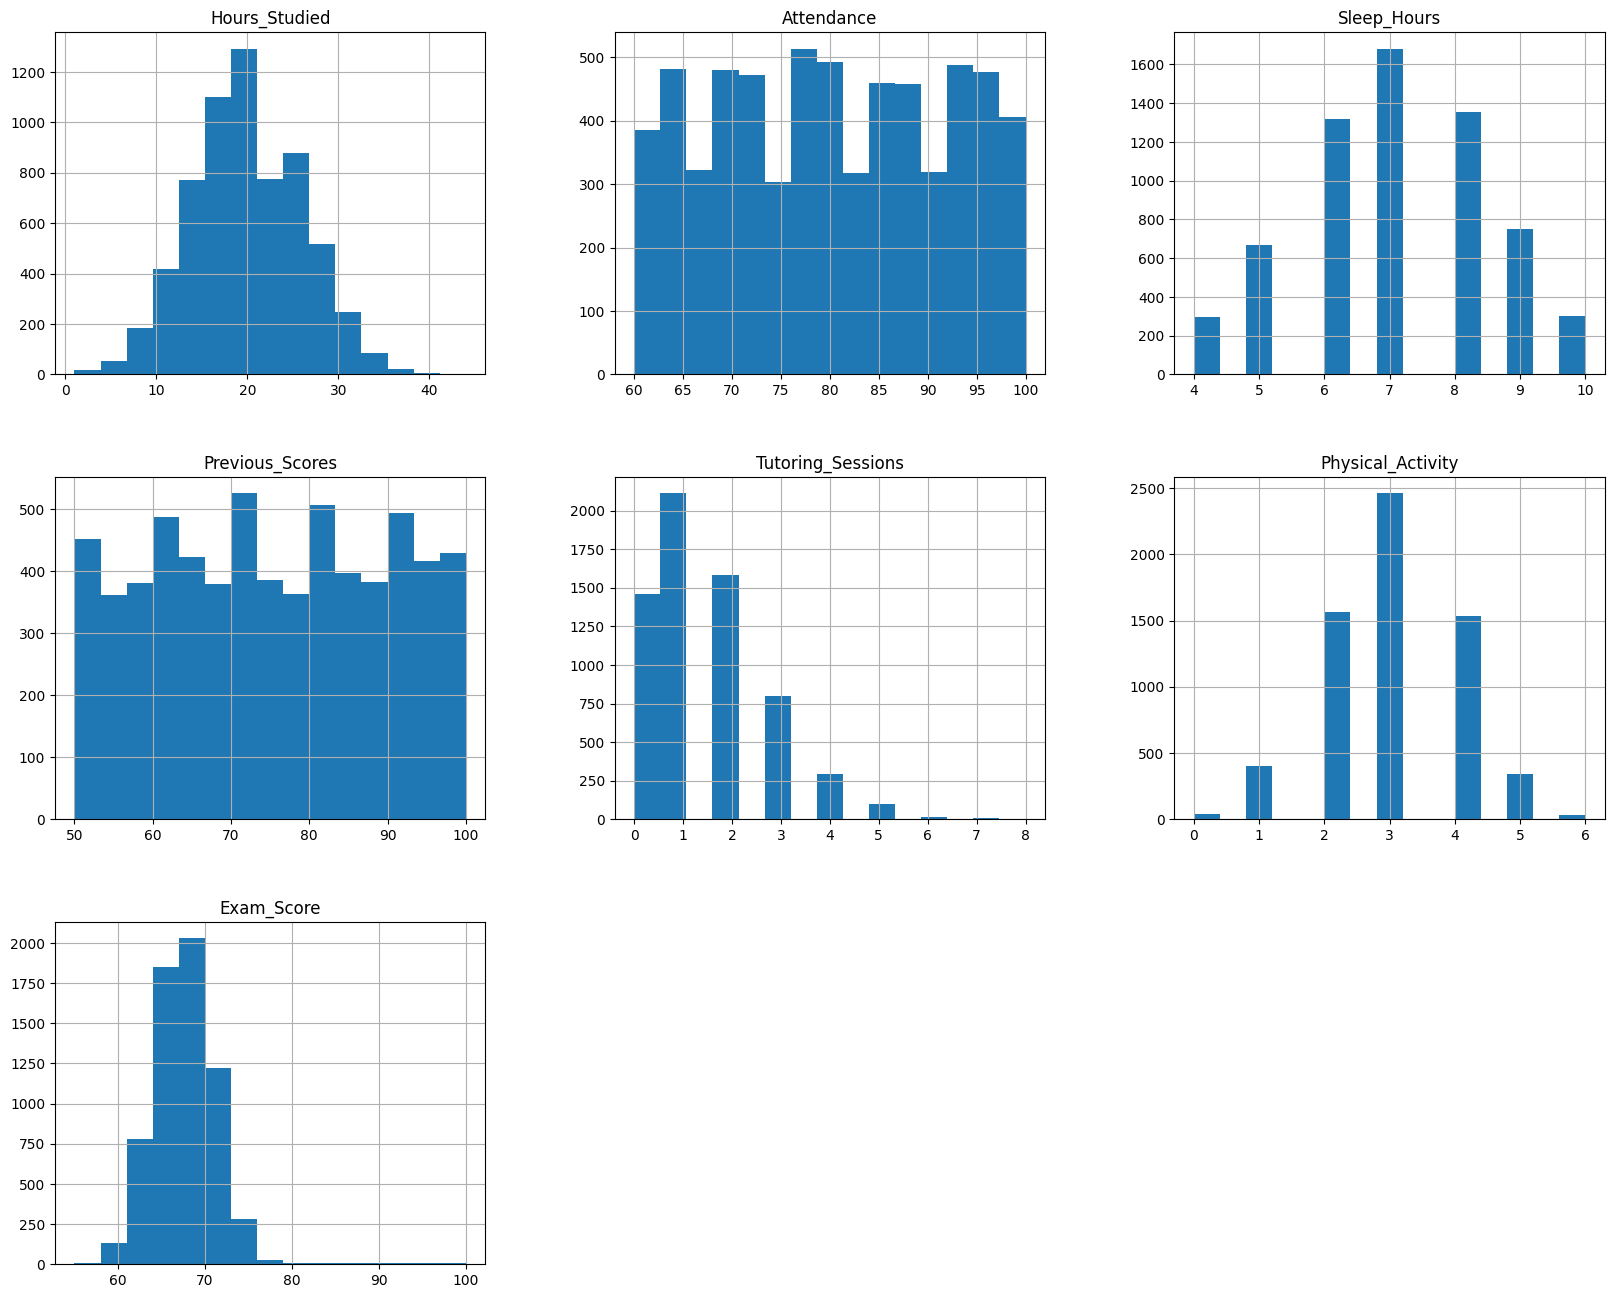

In [9]:
df.hist(bins=15, figsize=(20,16));

# Hours_Studied, Sleep_Hours, Physical_Activity, Exam_Score aparentam ser uma distribuição normal
# Tutoring_Sessions e Exam_Score aparentam ter outliers

#### 2.2 Tendência central e dispersão

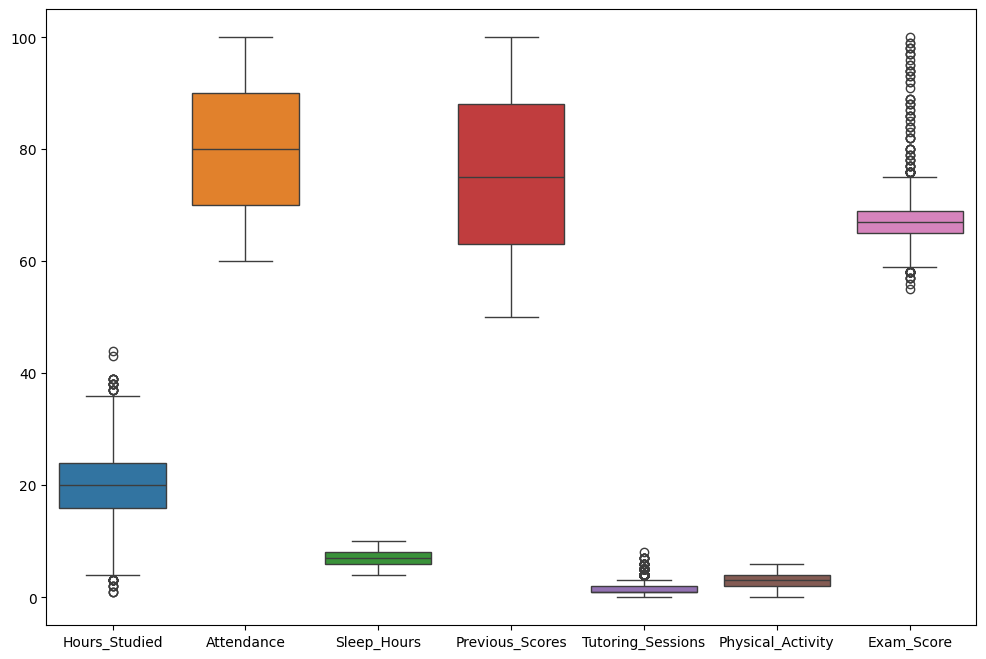

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.show()

# Alguns dados apresentam outliers, no entanto, são dados válidos

#### 2.3 Correlação entre variáveis

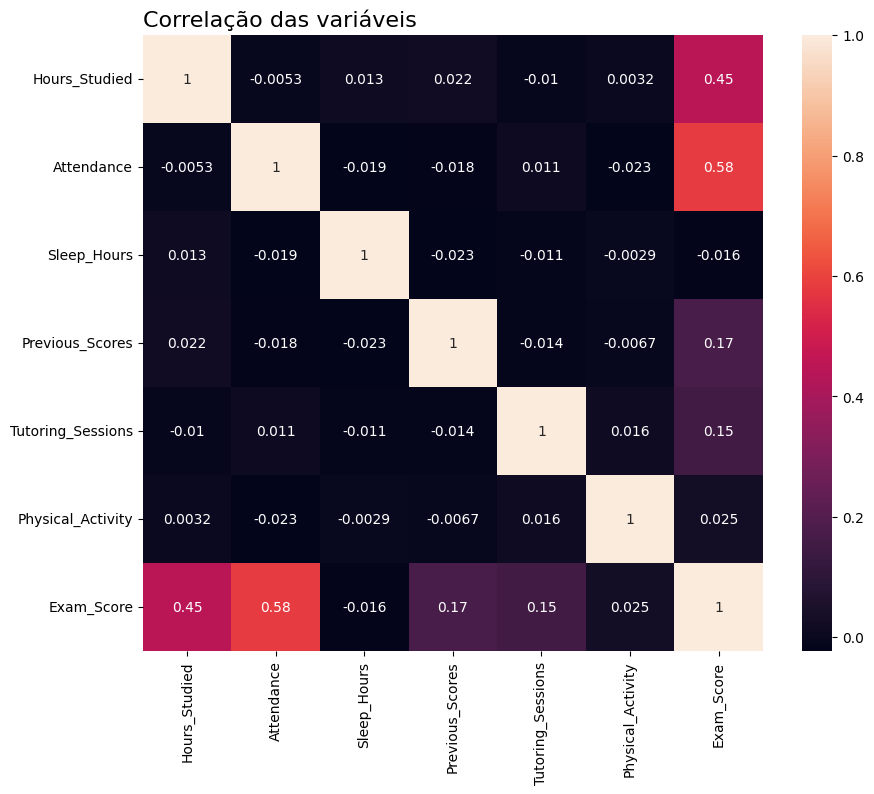

In [11]:
# Correlação

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='rocket')
plt.title('Correlação das variáveis', loc='left', fontsize=16)
plt.show()

# Os dados de Hours_Studied, Attendance, Previous_Scores e Tutoring_Sessions são os dados com maior correlação com as notas nos exames
# A frequência de participação nas aulas é a variável com maior correlação com as notas

## 3. Hipoteses


In [12]:
alpha = 0.05

## 3.1 Hipoteses

#### Alunos com renda familiar elevada apresentam notas maiores em relação aos demais?

P: 0.8463258738715196
Variância semelhante (Falha em rejeitar h0)

P: 9.341452388666903e-13
Alunos com diferentes níveis de renda apresentam diferenças significativas nas notas (Rejeitar h0)


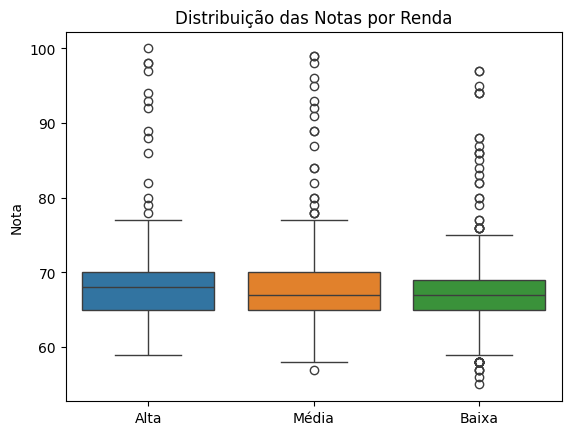

In [13]:
df_family_income_high = df[df.Family_Income == 'High']['Exam_Score']
df_family_income_medium = df[df.Family_Income == 'Medium']['Exam_Score']
df_family_income_low = df[df.Family_Income == 'Low']['Exam_Score']

# Variância semelhantes?
h1_lev_stats, h1_lev_p = stats.levene(df_family_income_high, df_family_income_medium, df_family_income_low)
print(f"P: {h1_lev_p}")

if(h1_lev_p > alpha):
  print("Variância semelhante (Falha em rejeitar h0)")
else:
  print("Variâncias diferentes (Rejeitar h0)")

# Apresentam diferenças significativas?
h1_anova_stats, h1_anova_p = stats.f_oneway(df_family_income_high, df_family_income_medium, df_family_income_low)
print(f"\nP: {h1_anova_p}")

if(h1_anova_p > alpha):
  print("Alunos com diferentes níveis de renda NÃO apresentam diferenças significativas nas notas (Falha em rejeitar h0)")
else:
  print("Alunos com diferentes níveis de renda apresentam diferenças significativas nas notas (Rejeitar h0)")

sns.boxplot(data=pd.DataFrame({'Alta': df_family_income_high, 'Média': df_family_income_medium, 'Baixa': df_family_income_low}))
plt.title("Distribuição das Notas por Renda")
plt.ylabel("Nota")
plt.show()

In [14]:
print('Através das análises, os dados apontam que sim, a renda familiar tem impacto nas notas dos alunos, sendo que alunos com maior renda familiar tendem a ter maiores notas\n')

pd.concat([df_family_income_high.describe(), df_family_income_medium.describe(), df_family_income_low.describe()], axis=1, keys=['Alta', 'Média', 'Baixa'])

Através das análises, os dados apontam que sim, a renda familiar tem impacto nas notas dos alunos, sendo que alunos com maior renda familiar tendem a ter maiores notas



,Alta,Média,Baixa
count,1229.000000,2566.000000,2582.000000
mean,67.814483,67.371005,66.853215
std,4.070601,3.827815,3.826809
min,59.000000,57.000000,55.000000
25%,65.000000,65.000000,65.000000
50%,68.000000,67.000000,67.000000
75%,70.000000,70.000000,69.000000
max,100.000000,99.000000,97.000000


## 3.2 Hipoteses

#### "As pessoas que apresentam mais horas de sono tiram notas maiores em comparacao aos demais?"

P (Levene): 0.765799262575345
Variância semelhante (Falha em rejeitar H0)

P (ANOVA): 0.590840058512839
Horas de sono NÃO afetam significativamente as notas (Falha em rejeitar H0)


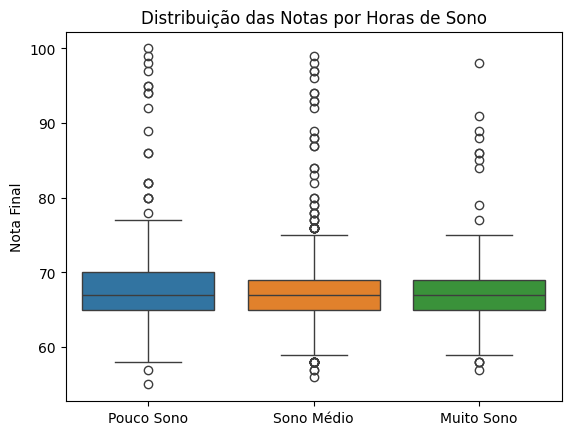

In [15]:
# Divisao dos grupos por tercis
q1 = df['Sleep_Hours'].quantile(0.33)
q2 = df['Sleep_Hours'].quantile(0.66)

df_sono_baixo = df[df['Sleep_Hours'] <= q1]['Exam_Score']
df_sono_medio = df[(df['Sleep_Hours'] > q1) & (df['Sleep_Hours'] <= q2)]['Exam_Score']
df_sono_alto = df[df['Sleep_Hours'] > q2]['Exam_Score']

# variância semelhante?
h2_lev_stats, h2_lev_p = stats.levene(df_sono_baixo, df_sono_medio, df_sono_alto)
print(f"P (Levene): {h2_lev_p}")

if h2_lev_p > alpha:
    print("Variância semelhante (Falha em rejeitar H0)")
else:
    print("Variâncias diferentes (Rejeitar H0)")

# diferenças significativas nas médias das notas?
h2_anova_stats, h2_anova_p = stats.f_oneway(df_sono_baixo, df_sono_medio, df_sono_alto)
print(f"\nP (ANOVA): {h2_anova_p}")

if h2_anova_p > alpha:
    print("Horas de sono NÃO afetam significativamente as notas (Falha em rejeitar H0)")
else:
    print("Horas de sono afetam significativamente as notas (Rejeitar H0)")

sns.boxplot(data=pd.DataFrame({'Pouco Sono': df_sono_baixo,'Sono Médio': df_sono_medio,'Muito Sono': df_sono_alto}))
plt.title("Distribuição das Notas por Horas de Sono")
plt.ylabel("Nota Final")
plt.show()

In [16]:
print("A análise estatística indica que não há evidências suficientes para afirmar que a quantidade de sono influencia significativamente as notas dos alunos. Ou seja, dentro dessa base de dados, dormir mais ou menos não parece impactar diretamente o desempenho no exame.\n")
pd.concat([df_sono_baixo.describe(), df_sono_medio.describe(), df_sono_alto.describe()], axis=1, keys=['Pouco Sono', 'Sono Médio', 'Muito Sono'])


A análise estatística indica que não há evidências suficientes para afirmar que a quantidade de sono influencia significativamente as notas dos alunos. Ou seja, dentro dessa base de dados, dormir mais ou menos não parece impactar diretamente o desempenho no exame.



,Pouco Sono,Sono Médio,Muito Sono
count,2285.000000,3036.000000,1056.000000
mean,67.276586,67.263175,67.135417
std,3.939405,3.865734,3.863505
min,55.000000,56.000000,57.000000
25%,65.000000,65.000000,65.000000
50%,67.000000,67.000000,67.000000
75%,70.000000,69.000000,69.000000
max,100.000000,99.000000,98.000000


## 3.3 Hipoteses

#### "Alunos que praticam mais horas de atividades fisicas obtem notas maiores nas provas em comparacao aos demais ?"

P (Levene): 0.6339627154076362
Variância semelhante (Falha em rejeitar H0)

P (Anova): 0.06568753997146946
Níveis de atividade física NÃO afetam significativamente as notas (Falha em rejeitar H0)


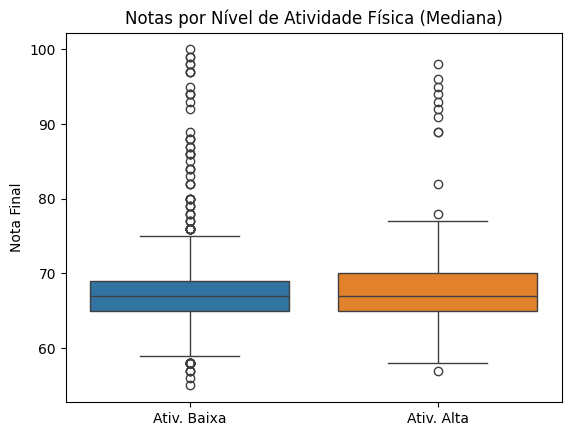

In [17]:
mediana = df['Physical_Activity'].median()

baixo = df[df['Physical_Activity'] <= mediana]['Exam_Score']
alto = df[df['Physical_Activity'] > mediana]['Exam_Score']

# variância semelhante?
h3_lev_stats, h3_lev_p = stats.levene(baixo, alto)
print(f"P (Levene): {h3_lev_p}")

if h3_lev_p > alpha:
    print("Variância semelhante (Falha em rejeitar H0)")
else:
    print("Variâncias diferentes (Rejeitar H0)")

# Diferença significativa nas médias das notas?
h3_anova_stats, h3_anova_p = stats.f_oneway(baixo, alto)
print(f"\nP (Anova): {h3_anova_p}")

if h3_anova_p > alpha:
    print("Níveis de atividade física NÃO afetam significativamente as notas (Falha em rejeitar H0)")
else:
    print("Níveis de atividade física afetam significativamente as notas (Rejeitar H0)")

sns.boxplot(data=pd.DataFrame({'Ativ. Baixa': baixo, 'Ativ. Alta': alto}))
plt.title("Notas por Nível de Atividade Física (Mediana)")
plt.ylabel("Nota Final")
plt.show()

In [18]:
print("Dentro dessa base de dados, embora o valor de p esteja próximo do limiar de significância (0.05) os dados não fornecem evidência estatística suficiente para concluir que a atividade física impacta diretamente as notas dos alunos.")

pd.concat([baixo.describe(), alto.describe()], axis=1, keys=['Baixa atv. fisica', 'Alta atv. fisica'])



Dentro dessa base de dados, embora o valor de p esteja próximo do limiar de significância (0.05) os dados não fornecem evidência estatística suficiente para concluir que a atividade física impacta diretamente as notas dos alunos.


,Baixa atv. fisica,Alta atv. fisica
count,4465.000000,1912.000000
mean,67.188130,67.383891
std,3.927775,3.803399
min,55.000000,57.000000
25%,65.000000,65.000000
50%,67.000000,67.000000
75%,69.000000,70.000000
max,100.000000,98.000000


## 4. Analise preditiva

- Regressão linear simples com uma variável independente
- Regressão linear múltipla com pelo menos duas variáveis

#### - Compare os modelos usando métricas vistas em aula.
#### - Discuta a aplicabilidade dos modelos no contexto empresarial

In [19]:
y = df['Exam_Score']

# Regressão Linear Simples - Horas de estudo semanais
x_simple = df[['Hours_Studied']]
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_simple, y, test_size=0.2, random_state=33)

model_simple = LinearRegression()
model_simple.fit(x_train_s, y_train_s)
y_pred_s = model_simple.predict(x_test_s)
rmse_simple = sqrt(mean_squared_error(y_test_s, y_pred_s))

print(f"RMSE Regressão Simples (Horas de estudo semanais → Nota): {rmse_simple:.2f}")
print("RMSE baixo, indicando ter uma boa correlação")

RMSE Regressão Simples (Horas de estudo semanais → Nota): 3.58
RMSE baixo, indicando ter uma boa correlação


In [20]:
# Regressão Linear Múltipla
x_multi = df[['Sleep_Hours', 'Motivation_Level', 'Extracurricular_Activities']].copy()
x_multi['Motivation_Level'] = x_multi['Motivation_Level'].map({ 'High': 1, 'Medium': 0.5, 'Low': 0 })
x_multi['Extracurricular_Activities'] = x_multi['Extracurricular_Activities'].map({ 'Yes': 1, 'No': 0 })

x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x_multi, y, test_size=0.2, random_state=33)

model_multi = LinearRegression()
model_multi.fit(x_train_m, y_train_m)
y_pred_m = model_multi.predict(x_test_m)
rmse_multi = sqrt(mean_squared_error(y_test_m, y_pred_m))

print(f"RMSE Regressão Múltipla (Sono + Motivação + Atividades Extracurriculares → Nota): {rmse_multi:.2f}")
print("RMSE baixo, indicando ter uma boa correlação")

RMSE Regressão Múltipla (Sono + Motivação + Atividades Extracurriculares → Nota): 3.85
RMSE baixo, indicando ter uma boa correlação


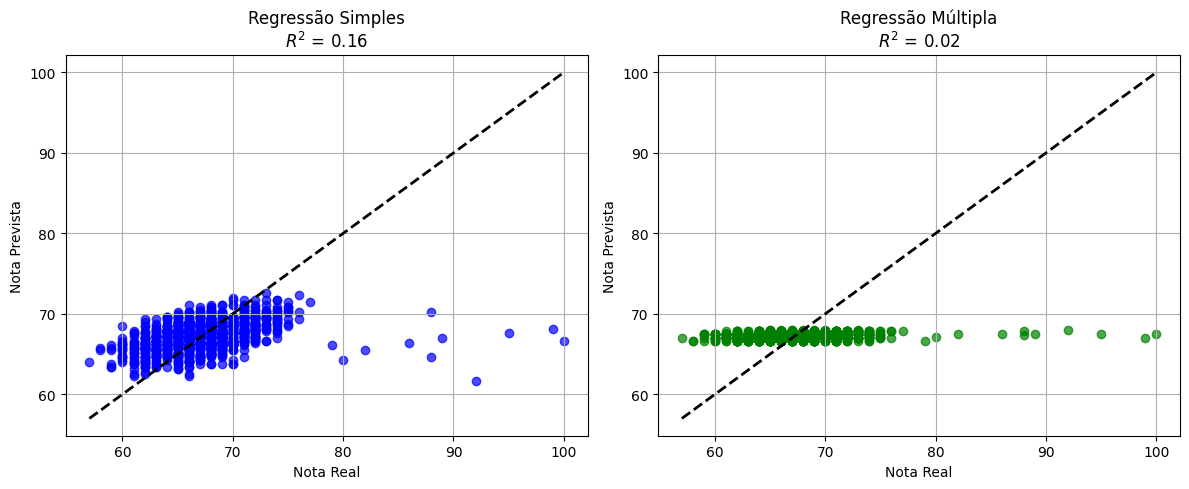

O gráfico apresenta a maioria dos valores interquartis, lembrando que as notas apresentaram outliers nos valores máximos
Ambos os modelos treinados apresentam uma acertividade satisfatória para prever as notas dos alunos


In [21]:
# Calcular R² para ambos os modelos
r2_simple = r2_score(y_test_s, y_pred_s)
r2_multi = r2_score(y_test_m, y_pred_m)

# Gráfico: Regressão Simples
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_s, y_pred_s, alpha=0.7, color='blue')
plt.plot([y_test_s.min(), y_test_s.max()], [y_test_s.min(), y_test_s.max()], 'k--', lw=2)
plt.xlabel('Nota Real')
plt.ylabel('Nota Prevista')
plt.title(f'Regressão Simples\n$R^2$ = {r2_simple:.2f}')
plt.grid(True)

# Gráfico: Regressão Múltipla
plt.subplot(1, 2, 2)
plt.scatter(y_test_m, y_pred_m, alpha=0.7, color='green')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'k--', lw=2)
plt.xlabel('Nota Real')
plt.ylabel('Nota Prevista')
plt.title(f'Regressão Múltipla\n$R^2$ = {r2_multi:.2f}')
plt.grid(True)

plt.tight_layout()
plt.show()

print("O gráfico apresenta a maioria dos valores interquartis, lembrando que as notas apresentaram outliers nos valores máximos")
print("Ambos os modelos treinados apresentam uma acertividade satisfatória para prever as notas dos alunos")

## 5. Conclusão e Recomendações

A base apresenta dados muito concisos e com poucos erros (menos de 3,5%). Além disso, como é possível observar pelos histogramas, diversos dados apresentam uma tendência a uma distribuição normal. Ademais, as notas dos alunos no exame possuem um baixo desvio padrão, variância e apresentam outliers majoritariamente superiores como é visível através do boxplot.
\
\
A base demonstra ser uma boa fonte para análise das variáveis que mais impactam o desempenho dos alunos. Assim, análises realizadas de forma individual apresentam evidências que a renda familiar possui um maior impacto do que horas de sono e atividade física.
\
\
Além disso, as horas de estudo apresentam uma alta correlação com as notas, assim, como analisado através de uma regressão linear, apresentaram um RMSE muito próximo ao desvio padrão, sendo uma boa referência para prever o desempenho dos alunos. Ademais, variáveis conjuntas como sono, motivação e atividades extracurriculares apresentaram um comportamento muito semelhante.
\
\
Dessa forma, através desses indícios estatísticos, é possível avaliar que um empenho da instituição para melhorar a qualidade/tempo de sono, motivação, tempo de estudo e participação dos alunos em atividades extracurriculares pode ser um caminho interessante a ser seguido visando uma melhora no desempenho dos seus estudantes nos exames.


## 6. Link para Slides e Doc

- [Slides](https://docs.google.com/presentation/d/e/2PACX-1vRCmbTWB89XKDLMTbdi1EhJPZ-1tWNocfvKpvfWBcFPGfVfrhmzPfq_fUa-if_fZzylwNw8wUcGC2H6/pub?start=false&loop=false&delayms=5000)

- [Doc](https://docs.google.com/document/d/e/2PACX-1vQY0PXrpur5pmj-LCrqlg9Ai-O-lC_qJ2C8M2HZRXALiXmp4kct9oqEJkDcU2CTn-0BmUVScTOZQGXW/pub)

### Obrigado !